In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\deepg\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('BankNote_Authentication.csv')

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


(array([ 21.,  41., 112., 220., 200., 230., 183., 214., 131.,  20.]),
 array([-7.0421 , -5.65541, -4.26872, -2.88203, -1.49534, -0.10865,
         1.27804,  2.66473,  4.05142,  5.43811,  6.8248 ]),
 <BarContainer object of 10 artists>)

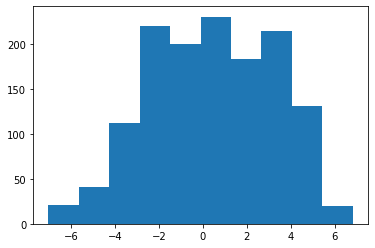

In [6]:
plt.hist(df['variance'],bins=10)

(array([ 30.,  37., 100., 128., 113., 272., 247., 162., 209.,  74.]),
 array([-13.7731 , -11.10063,  -8.42816,  -5.75569,  -3.08322,  -0.41075,
          2.26172,   4.93419,   7.60666,  10.27913,  12.9516 ]),
 <BarContainer object of 10 artists>)

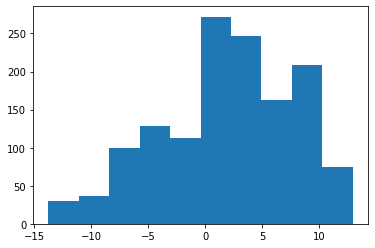

In [7]:
plt.hist(df['skewness'],bins=10)

(array([198., 257., 391., 224., 116.,  84.,  56.,  25.,   7.,  14.]),
 array([-5.2861 , -2.96475, -0.6434 ,  1.67795,  3.9993 ,  6.32065,
         8.642  , 10.96335, 13.2847 , 15.60605, 17.9274 ]),
 <BarContainer object of 10 artists>)

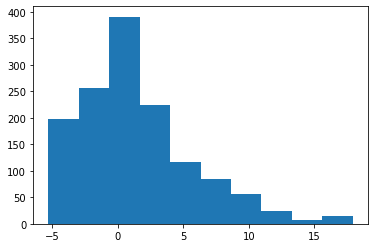

In [8]:
plt.hist(df['curtosis'],bins=10)

(array([ 16.,  25.,  35.,  72., 124., 120., 220., 363., 343.,  54.]),
 array([-8.5482 , -7.44843, -6.34866, -5.24889, -4.14912, -3.04935,
        -1.94958, -0.84981,  0.24996,  1.34973,  2.4495 ]),
 <BarContainer object of 10 artists>)

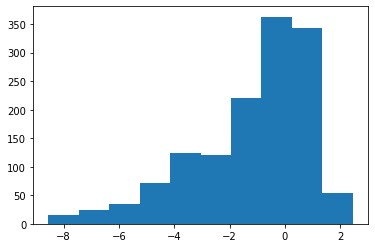

In [9]:
plt.hist(df['entropy'],bins=10)

<AxesSubplot:xlabel='class', ylabel='count'>

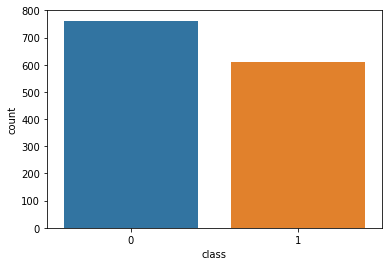

In [10]:
sns.countplot(x=df['class'])

In [11]:
df.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [12]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
df.shape

(1372, 5)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Lazy Predict

In [16]:
!pip install lazypredict

In [17]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [00:00<00:00, 21.38it/s]

[12:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 20.72it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,1.00,1.00,0.24
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.03
XGBClassifier,1.00,1.00,1.00,1.00,0.19
SVC,1.00,1.00,1.00,1.00,0.04
LabelSpreading,1.00,1.00,1.00,1.00,0.06
LabelPropagation,1.00,1.00,1.00,1.00,0.05
KNeighborsClassifier,1.00,1.00,1.00,1.00,0.05
RandomForestClassifier,1.00,1.00,1.00,1.00,0.04
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.17


In [18]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,1.00,1.00,0.24
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.03
XGBClassifier,1.00,1.00,1.00,1.00,0.19
SVC,1.00,1.00,1.00,1.00,0.04
LabelSpreading,1.00,1.00,1.00,1.00,0.06
LabelPropagation,1.00,1.00,1.00,1.00,0.05
KNeighborsClassifier,1.00,1.00,1.00,1.00,0.05
RandomForestClassifier,1.00,1.00,1.00,1.00,0.04
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.17


# SVC RBF Kernel

In [19]:
from sklearn import svm
clf_best = svm.SVC(kernel='rbf')
clf_best.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred = clf_best.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
cm = confusion_matrix(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [22]:
cm

array([[191,   0],
       [  0, 152]], dtype=int64)

In [23]:
acc_score

1.0

In [24]:
roc_auc

1.0

In [25]:
import pickle

In [26]:
filename = 'svc_rbf.pkl'
outfile = open(filename,'wb')
pickle.dump(clf_best,outfile)
outfile.close()

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred_lr = clf_lr.predict(X_test)

In [29]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
acc_score_lr = accuracy_score(y_test,y_pred_lr)
roc_auc_lr = roc_auc_score(y_test,y_pred_lr)

In [30]:
cm_lr

array([[189,   2],
       [  2, 150]], dtype=int64)

In [31]:
acc_score_lr

0.9883381924198251

In [32]:
roc_auc_lr

0.9881854505373382

In [33]:
filename = 'logistic_reg.pkl'
outfile = open(filename,'wb')
pickle.dump(clf_lr,outfile)
outfile.close()

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred_rf = clf_rf.predict(X_test)

In [36]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
acc_score_rf = accuracy_score(y_test,y_pred_rf)
roc_auc_rf = roc_auc_score(y_test,y_pred_rf)

In [37]:
cm_rf

array([[191,   0],
       [  1, 151]], dtype=int64)

In [38]:
acc_score_rf

0.9970845481049563

In [39]:
roc_auc_rf

0.9967105263157895

In [40]:
filename = 'random_forest.pkl'
outfile = open(filename,'wb')
pickle.dump(clf_lr,outfile)
outfile.close()

# K-Neighbours CLassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf_kn = KNeighborsClassifier(n_neighbors=3)
clf_kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred_kn = clf_kn.predict(X_test)

In [43]:
cm_kn = confusion_matrix(y_test,y_pred_kn)
acc_score_kn = accuracy_score(y_test,y_pred_kn)
roc_auc_kn = roc_auc_score(y_test,y_pred_kn)

In [44]:
cm_kn

array([[191,   0],
       [  0, 152]], dtype=int64)

In [45]:
acc_score_kn

1.0

In [46]:
roc_auc_kn

1.0

In [47]:
filename = 'knn.pkl'
outfile = open(filename,'wb')
pickle.dump(clf_lr,outfile)
outfile.close()

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_pred_dt = clf_dt.predict(X_test)

In [50]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
acc_score_dt = accuracy_score(y_test,y_pred_dt)
roc_auc_dt = roc_auc_score(y_test,y_pred_dt)

In [51]:
cm_dt

array([[190,   1],
       [  3, 149]], dtype=int64)

In [52]:
acc_score_dt

0.9883381924198251

In [53]:
roc_auc_dt

0.987513777900248

In [54]:
filename = 'decision_tree.pkl'
outfile = open(filename,'wb')
pickle.dump(clf_lr,outfile)
outfile.close()

In [55]:
clf_dt.predict([[-3.2501,4.102,-2.031,-1.101]])

array([1], dtype=int64)